In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.animation as animation

In [45]:
df=pd.read_csv('/content/stack_overflow_tags.csv')

In [46]:
df.head()

tag  total_posts  total_views  total_answers  total_comments  \
0      python       299375     90079323         348131          590876   
1  javascript       263982    451873786         391643          630988   
2  javascript       255483    472718142         387566          598602   
3  javascript       249896    365146121         359271          618928   
4  javascript       235506    539036428         374997          534326   

   total_favorites  year  
0          30885.0  2020  
1          87591.0  2016  
2          95078.0  2015  
3          67271.0  2017  
4         101135.0  2014

In [47]:
# Standardize tags to lowercase
df['tag'] = df['tag'].str.lower()
# Group by 'tag' and 'year', then aggregate
df = df.groupby(['tag', 'year']).agg({
    'total_posts': 'sum',
    'total_views': 'sum',
    'total_answers': 'sum',
    'total_comments': 'sum',
    'total_favorites': 'sum'
}).reset_index()

In [48]:
# Get all unique values in the 'tag' column
unique_tags = df['tag'].unique()
print("Unique tags:", unique_tags)

Unique tags: ['.htaccess' '.net' '.net-4.0' '.net-core' '3d' 'actionscript'
 'actionscript-3' 'active-directory' 'activerecord' 'admob' 'ado.net'
 'aggregation-framework' 'air' 'ajax' 'akka' 'algorithm' 'alignment'
 'amazon-dynamodb' 'amazon-ec2' 'amazon-elastic-beanstalk' 'amazon-s3'
 'amazon-web-services' 'anaconda' 'android' 'android-actionbar'
 'android-activity' 'android-asynctask' 'android-edittext'
 'android-emulator' 'android-fragments' 'android-gradle-plugin'
 'android-intent' 'android-layout' 'android-listview' 'android-ndk'
 'android-recyclerview' 'android-sqlite' 'android-studio'
 'android-viewpager' 'angular' 'angular-material' 'angular-ui-router'
 'angular6' 'angularjs' 'angularjs-directive' 'angularjs-ng-repeat'
 'angularjs-scope' 'animation' 'annotations' 'ansible' 'ant' 'apache'
 'apache-camel' 'apache-flex' 'apache-kafka' 'apache-poi' 'apache-spark'
 'apache-spark-sql' 'apache2' 'api' 'app-store' 'append'
 'apple-push-notifications' 'applescript' 'architecture' 'ardui

In [49]:
# Count the number of unique tags
unique_tags_count = len(unique_tags)
print("Unique tags count:", unique_tags_count)

Unique tags count: 999


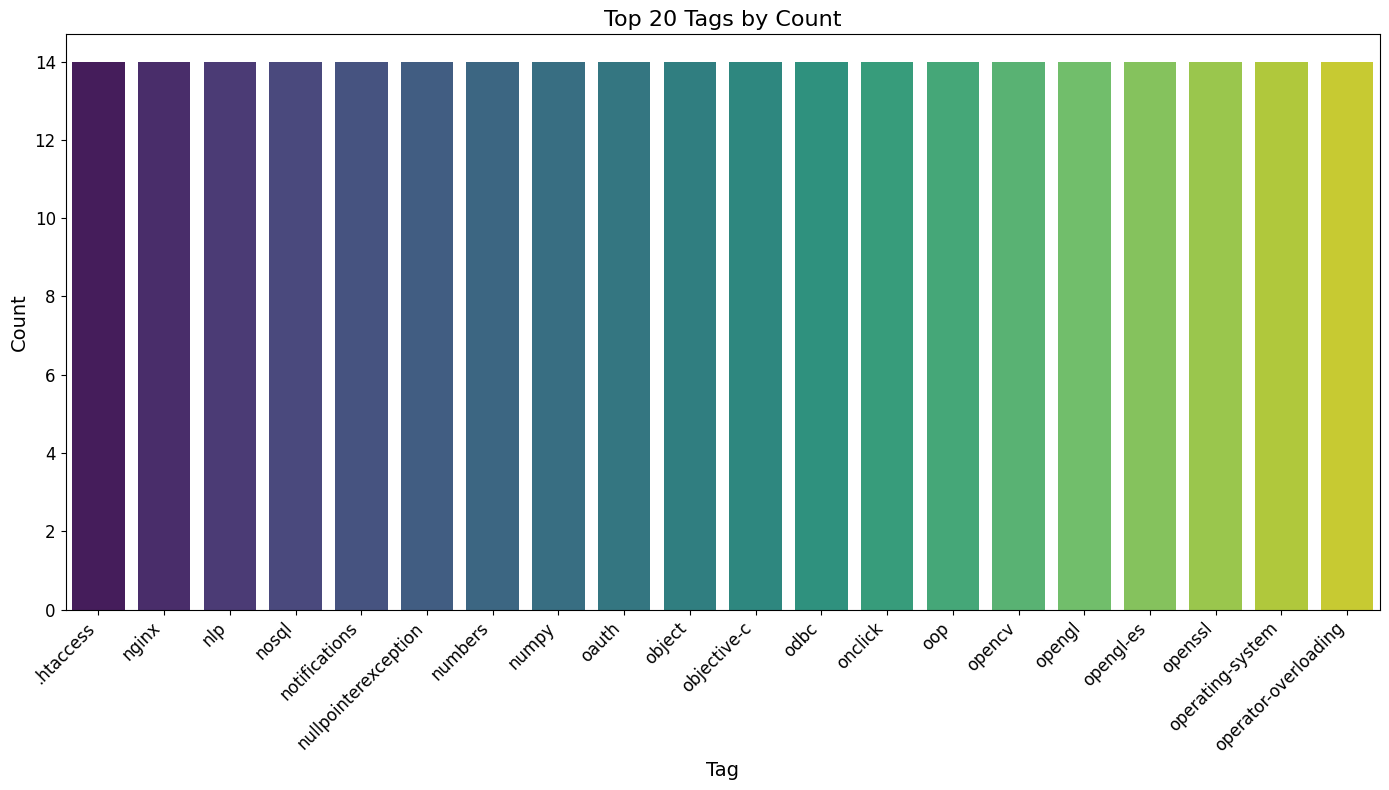

In [50]:
# Get the count of each tag
tag_counts = df['tag'].value_counts().reset_index()
tag_counts.columns = ['tag', 'count']

# Select the top 20 tags
top_20_tags = tag_counts.head(20)

# Plot the count plot for top 20 tags
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_tags, x='tag', y='count', palette='viridis')
plt.title('Top 20 Tags by Count', fontsize=16)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

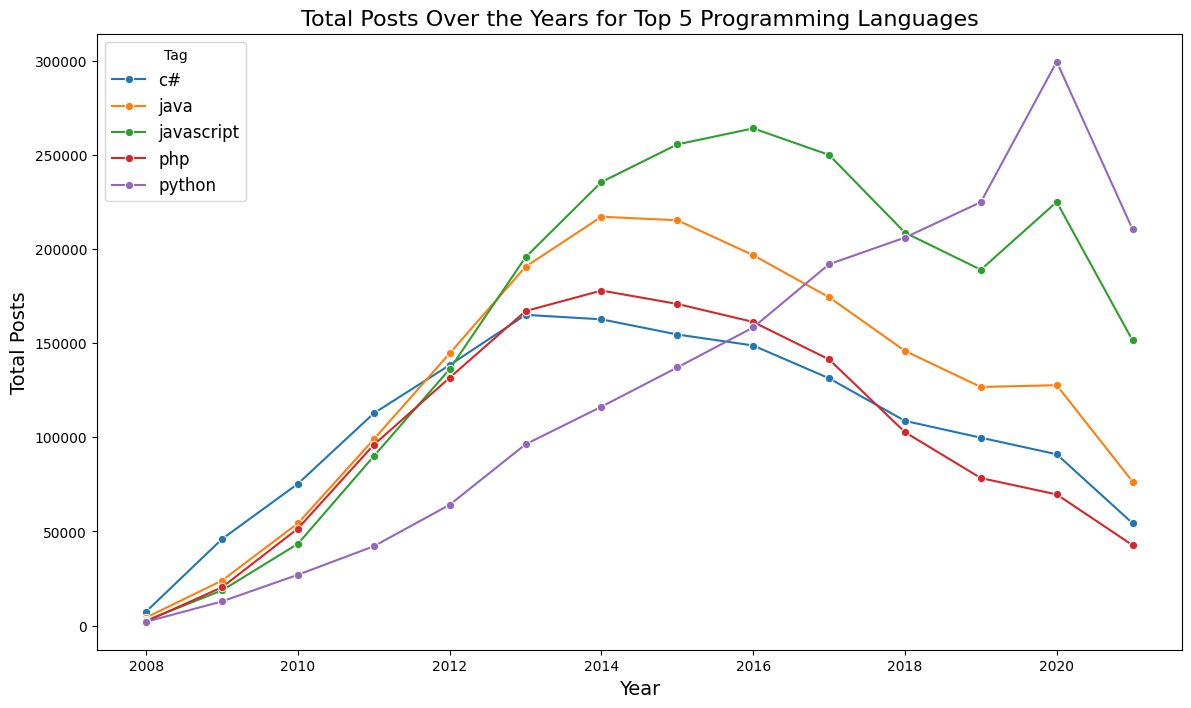

In [62]:
# Plot time series for top 5 tags by total posts
top_5_tags = df.groupby('tag')['total_posts'].sum().nlargest(5).index
top_5_df = df[df['tag'].isin(top_5_tags)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=top_5_df, x='year', y='total_posts', hue='tag', marker='o')
plt.title('Total Posts Over the Years for Top 5 Programming Languages', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Posts', fontsize=14)
plt.legend(title='Tag', fontsize=12)
plt.show()

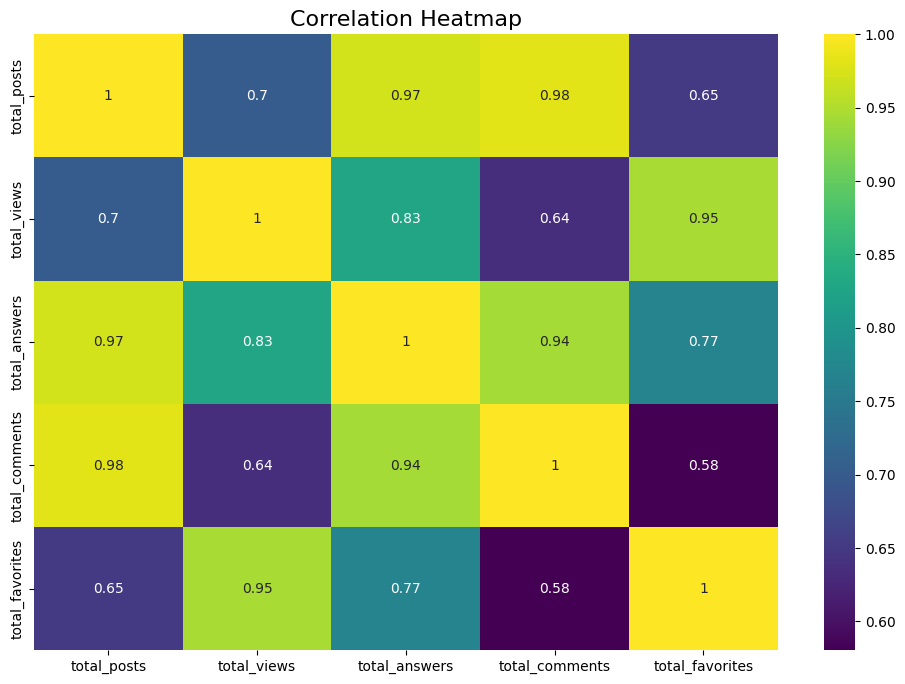

In [52]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['total_posts', 'total_views', 'total_answers', 'total_comments', 'total_favorites']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

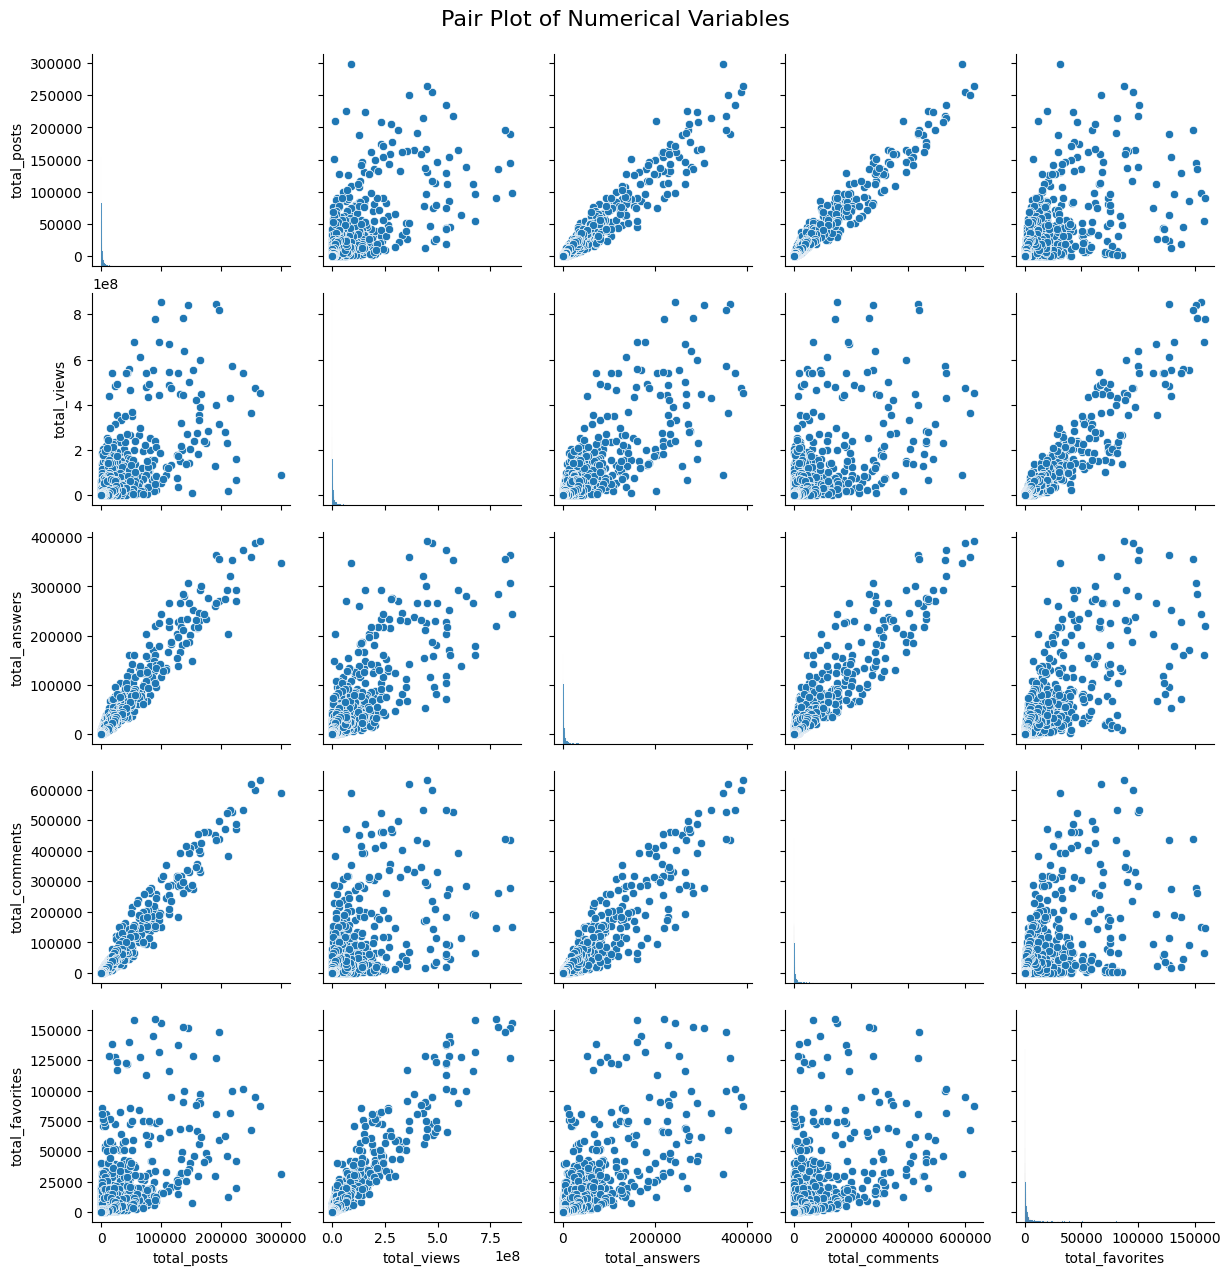

In [53]:
sns.pairplot(df[['total_posts', 'total_views', 'total_answers', 'total_comments', 'total_favorites']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)
plt.show()

In [75]:
# Summarize data by tag
tag_summary = df.groupby('tag')['total_posts'].sum().reset_index()

# Create Treemap
fig = px.treemap(tag_summary, path=['tag'], values='total_posts', title='Distribution of Total Posts Among Tags')
fig.update_layout(title_font_size=16)
fig.show()

In [76]:
# Summarize data by year and tag
yearly_tag_data = df.groupby(['year', 'tag'])['total_posts'].sum().reset_index()

# Pivot the data for stacked area plot
pivot_data = yearly_tag_data.pivot(index='year', columns='tag', values='total_posts').fillna(0)

# Plot stacked area chart using Plotly
fig = px.area(yearly_tag_data, x='year', y='total_posts', color='tag',
              title='Stacked Area Plot of Total Posts Over the Years by Tag',
              labels={'total_posts': 'Total Posts', 'year': 'Year', 'tag': 'Tag'})

# Customize the layout for better appearance
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Center the title
    xaxis_title='Year',
    yaxis_title='Total Posts',
    legend_title='Tag',
    legend=dict(
        title='Tag',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.05
    ),
    margin=dict(l=20, r=20, t=60, b=60)
)

fig.show()

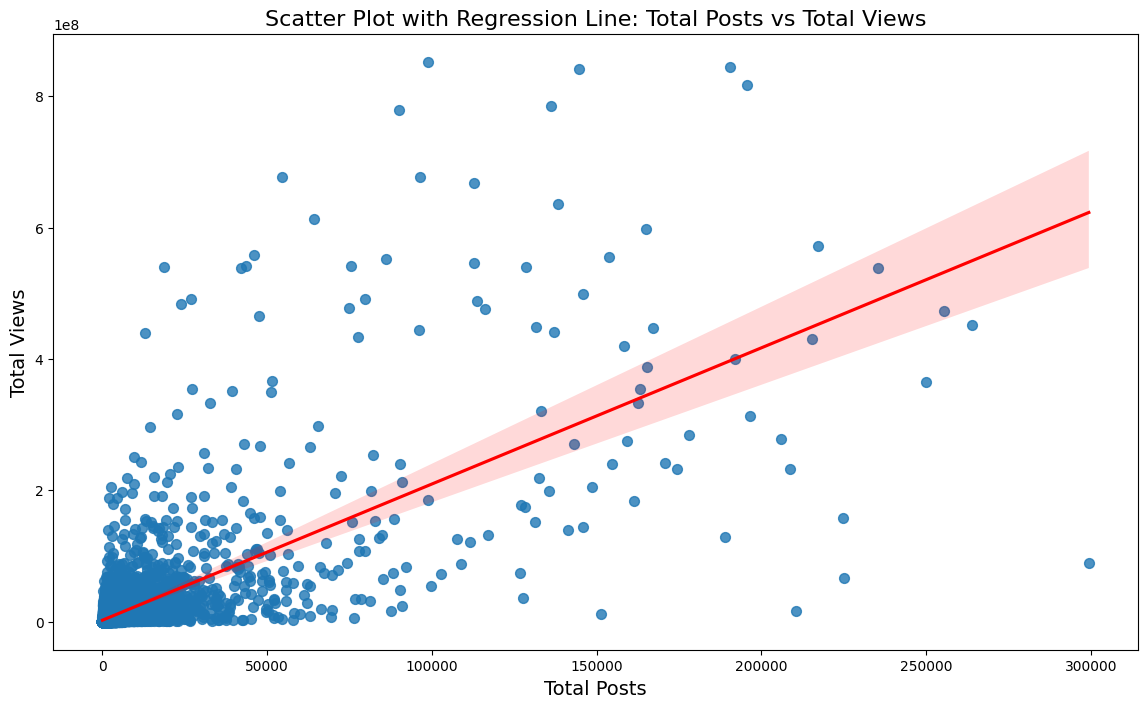

In [56]:
plt.figure(figsize=(14, 8))
sns.regplot(data=df, x='total_posts', y='total_views', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Total Posts vs Total Views', fontsize=16)
plt.xlabel('Total Posts', fontsize=14)
plt.ylabel('Total Views', fontsize=14)
plt.show()

In [57]:
# Create Bubble Plot
fig = px.scatter(df, x='total_posts', y='total_views', size='total_comments', color='tag',
                 hover_name='tag', size_max=60, title='Bubble Plot: Total Posts vs Total Views with Total Comments as Bubble Size')
fig.update_layout(title_font_size=16, xaxis_title='Total Posts', yaxis_title='Total Views')
fig.show()

In [77]:
# Create 3D Scatter Plot
fig = px.scatter_3d(df, x='total_comments', y='total_answers', z='total_favorites', color='tag',
                    title='3D Scatter Plot: Total Comments, Total Answers, and Total Favorites')
fig.update_layout(title_font_size=16, scene=dict(xaxis_title='Total Comments', yaxis_title='Total Ans', zaxis_title='Total Fav'))
fig.show()

In [59]:
# Create Parallel Coordinates Plot
fig = px.parallel_coordinates(df, dimensions=['total_comments', 'total_answers', 'total_favorites'],
                              color='total_favorites', labels={'total_comments': 'Total Comments',
                                                                'total_answers': 'Total Answers',
                                                                'total_favorites': 'Total Favorites'},
                              title='Parallel Coordinates Plot of Total Comments, Total Answers, and Total Favorites')
fig.update_layout(title_font_size=16)
fig.show()

In [60]:
fig = px.scatter_matrix(df, dimensions=['total_comments', 'total_answers', 'total_favorites'],
                       color='tag', title='Scatter Plot Matrix of Total Comments, Total Answers, and Total Favorites',
                       labels={'total_comments': 'Total Comments',
                               'total_answers': 'Total Answers',
                               'total_favorites': 'Total Favorites'})
fig.update_layout(title_font_size=16)
fig.show()

In [72]:
# Significant worldwide events
events = {
    2016: 'Introduction of 4G',
    2017: 'Windows 10 Launch',
    2020: 'COVID-19 Pandemic'
}

# Combine total posts and views into a single DataFrame
combined_df = df.groupby('year').agg({'total_posts': 'sum', 'total_views': 'sum'}).reset_index()

# Create Event Overlay Line Plot
fig = px.line(combined_df, x='year', y=['total_posts', 'total_views'],
              labels={'value': 'Total Posts / Total Views'},
              title='Year-wise Trends with Key Event Markers')

# Define colors for events
event_colors = ['red', 'blue', 'green']

# Add event markers and annotations
for idx, (year, event) in enumerate(events.items()):
    fig.add_vline(x=year, line_dash='dash', line_color=event_colors[idx])
    fig.add_annotation(x=year, y=combined_df[['total_posts', 'total_views']].max().max() * 1.05,
                       text=event, showarrow=True, arrowhead=2, yshift=10, font=dict(color=event_colors[idx]))

# Create an external legend for events
legend_items = [
    go.Scatter(
        x=[None], y=[None],
        mode='markers',
        marker=dict(size=10, color=event_colors[idx]),
        legendgroup=event,
        showlegend=True,
        name=event
    ) for idx, event in enumerate(events.values())
]

# Add invisible data points to create space for the legend
fig.add_traces(legend_items)

# Adjust layout for better spacing and appearance
fig.update_layout(
    title_font_size=20,
    title_x=0.5,  # Center the title
    margin=dict(l=20, r=20, t=60, b=60),  # Adjust margins
    legend=dict(
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.05,
        title='Events'
    ),
    annotations=[
        dict(
            x=0.5, y=-0.2,  # Position below the plot
            showarrow=False,
            text="Year-wise Trends with Key Event Markers",
            xref="paper", yref="paper",
            font=dict(size=14)
        )
    ]
)

fig.show()


In [80]:
# Plot box plot for each metric
fig = px.box(df.melt(id_vars='tag'), x='variable', y='value', color='tag',
             title='Distribution of Engagement Metrics by Tag',
             labels={'value': 'Count', 'variable': 'Metric', 'tag': 'Tag'})
fig.update_layout(title_font_size=20, title_x=0.5, margin=dict(l=20, r=20, t=60, b=60))
fig.show()